<a href="https://colab.research.google.com/github/polyst08/Chipotle-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(url, sep="\t")

df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
df['item_price_clean'] = df['item_price'].str.replace('$', '').astype(float)


<Axes: title={'center': 'Top 10 Most Ordered Items'}, ylabel='item_name'>

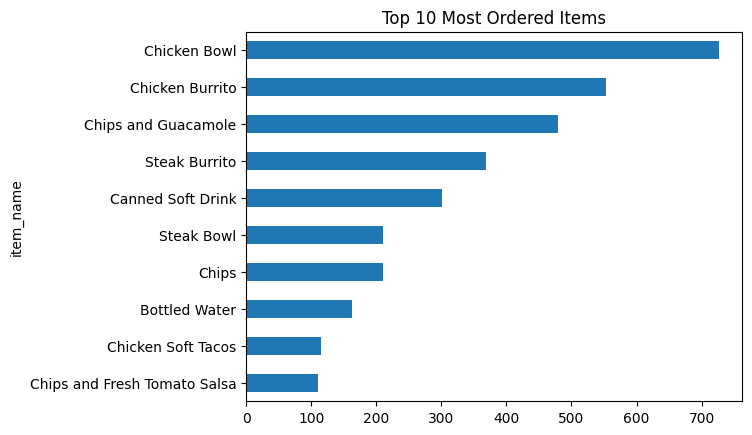

In [ ]:
df['item_name'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Most Ordered Items')


In [ ]:
import plotly.express as px
fig = px.treemap(df, path=['item_name'], values='item_price_clean', title='Sales Distribution by Item')
fig.show()


<Axes: title={'center': 'Top 5 Most Ordered Items'}, ylabel='count'>

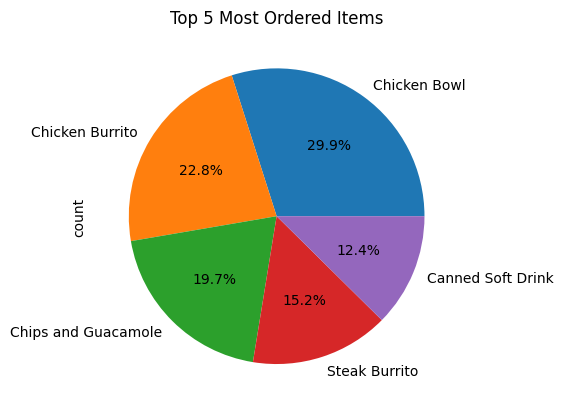

In [ ]:
top_items = df['item_name'].value_counts().head(5)
top_items.plot(kind='pie', autopct='%1.1f%%', title='Top 5 Most Ordered Items')


In [ ]:

# นับจำนวนการสั่งซื้อแต่ละเมนู
top_items = df['item_name'].value_counts().head(10)

# สร้าง DataFrame ใหม่สำหรับกราฟ
top_items_df = top_items.reset_index()
top_items_df.columns = ['item_name', 'order_count']

# เรียงจากน้อยไปมาก
top_items_df = top_items_df.sort_values(by='order_count')

# พล็อตกราฟแท่งแนวนอน
fig = px.bar(top_items_df,
             x='order_count',
             y='item_name',
             orientation='h',
             title='Top 10 Most Ordered Items (Ascending)',
             labels={'order_count': 'Number of Orders', 'item_name': 'Menu Item'})

fig.show()


In [ ]:
df['item_price_clean'] = df['item_price'].str.replace('$', '', regex=False).astype(float)
order_totals = df.groupby('order_id')['item_price_clean'].sum().reset_index()
fig = px.histogram(order_totals, x='item_price_clean', nbins=50, title='Distribution of Order Total Value')
fig.show()


In [ ]:
drink_items = df[df['item_name'].str.contains('Izze|Nantucket|Coca|Water', case=False)]
drink_counts = drink_items['item_name'].value_counts().reset_index()
drink_counts.columns = ['item_name', 'count']
fig = px.bar(drink_counts, x='item_name', y='count', title='Most Ordered Drinks')
fig.show()


In [ ]:
# ลบ NaN และรวมข้อความทั้งหมด
text = ' '.join(df['choice_description'].dropna().astype(str))

# แยกคำจากวงเล็บ
import re
addons = re.findall(r'\b[\w\s-]+\b', text)

# นับความถี่ของแต่ละคำ
from collections import Counter
addon_counts = Counter(addons)

# แสดง 20 อันดับแรก
print(addon_counts.most_common(20))


[('Rice', 2389), ('Cheese', 2281), ('Lettuce', 1742), ('Sour Cream', 1711), ('Fresh Tomato Salsa', 1397), ('Black Beans', 1342), ('Guacamole', 1037), ('Roasted Chili Corn Salsa', 727), ('Fajita Vegetables', 722), ('Pinto Beans', 582), ('Medium', 403), ('Mild', 382), ('Tomatillo Red Chili Salsa', 325), ('Fajita Veggies', 302), ('Hot', 262), ('Tomatillo-Red Chili Salsa', 259), ('Tomatillo Green Chili Salsa', 230), ('Diet Coke', 134), ('Tomatillo-Green Chili Salsa', 128), ('Coke', 123)]


In [ ]:
import pandas as pd
import plotly.express as px

# สร้าง DataFrame จาก Counter
addon_df = pd.DataFrame(addon_counts.items(), columns=['addon', 'count'])

# กรองคำที่ไม่ต้องการออก
exclude = ['hot', 'mild', 'medium']
addon_df = addon_df[~addon_df['addon'].str.lower().isin(exclude)]

# เรียงจากมากไปน้อย แล้วเลือก 20 อันดับแรก
addon_df = addon_df.sort_values(by='count', ascending=False).head(20)

# พล็อตกราฟแท่งแนวนอน พร้อมสีสวย ๆ
fig = px.bar(addon_df,
             x='count',
             y='addon',
             orientation='h',
             color='addon',
             color_discrete_sequence=px.colors.qualitative.Set3,
             title='Top 20 Most Common Add-ons (Filtered)',
             labels={'count': 'Frequency', 'addon': 'Add-on'})

fig.update_layout(showlegend=False)
fig.show()
